# Data Wrangling Template

## Gather

###  Gather 3 files for this project:

1. WeRateDogs Twitter archive (downloaded from udacity)
2. The tweet image predictions, i.e., what breed of dog (or other object, animal, etc.) is present in each tweet according to a neural network. This file (image_predictions.tsv) is hosted on Udacity's servers and should be downloaded programmatically
3. Each tweet's retweet count and favorite ("like") count at minimum, and any additional data you find interesting. Using the tweet IDs in the WeRateDogs Twitter archive, query the Twitter API for each tweet's JSON data using Python's Tweepy library and store each tweet's entire set of JSON data in a file called tweet_json.txt file. Each tweet's JSON data should be written to its own line. Then read this .txt file line by line into a pandas DataFrame with (at minimum) tweet ID, retweet count, and favorite count. Note: do not include your Twitter API keys, secrets, and tokens in your project submission.

In [1]:
import pandas as pd
import requests
import os
import tweepy
import json
from timeit import default_timer as timer
import numpy as np
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt


### Gather 3 files for this project

####  1. get WeRateDogs Twitter archive file

In [7]:
wrd_df = pd.read_csv('twitter-archive-enhanced.csv')

#### 2. This file (image_predictions.tsv) is hosted on Udacity's servers and should be downloaded programmatically


In [8]:
folder_name = "./"
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
r = requests.get(url)
with open(os.path.join(folder_name,
                  url.split('/')[-1]),mode='wb') as file:
    file.write(r.content)
    
img_pred_df = pd.read_csv('image-predictions.tsv','\t')


####  3.  Get Using the tweet IDs in the WeRateDogs Twitter archive, query the Twitter API for each tweet's JSON data

In [9]:
consumer_key = 'HIDDEN'
consumer_secret = 'HIDDEN'
access_token = 'HIDDEN'
access_secret = 'HIDDEN'

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth,wait_on_rate_limit=True)


####     Using Python's Tweepy library and store each tweet's entire set of JSON data in a file called tweet_json.txt 


In [7]:
count = 0
fails_dict = {}
start = timer()
tweet_ids = wrd_df.tweet_id.values
len(tweet_ids)

with open('tweet_json.txt', 'w') as outfile:

    #for tweet_id in wrd_df['tweet_id']:
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode="extended", wait_on_rate_limit=True,wait_on_rate_limit_notify=True)
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as error:        
            print('\nError. status not successful. Reason: ')
            print(error.reason)
            fails_dict[tweet_id] = error
            pass


end = timer()
print(end - start)
print(fails_dict)


1: 892420643555336193
Success
2: 892177421306343426
Success
3: 891815181378084864
Success
4: 891689557279858688
Success
5: 891327558926688256
Success
6: 891087950875897856
Success
7: 890971913173991426
Success
8: 890729181411237888
Success
9: 890609185150312448
Success
10: 890240255349198849
Success
11: 890006608113172480
Success
12: 889880896479866881
Success
13: 889665388333682689
Success
14: 889638837579907072
Success
15: 889531135344209921
Success
16: 889278841981685760
Success
17: 888917238123831296
Success
18: 888804989199671297
Success
19: 888554962724278272
Success
20: 888202515573088257

Error. status not successful. Reason: 
[{'code': 144, 'message': 'No status found with that ID.'}]
21: 888078434458587136
Success
22: 887705289381826560
Success
23: 887517139158093824
Success
24: 887473957103951883
Success
25: 887343217045368832
Success
26: 887101392804085760
Success
27: 886983233522544640
Success
28: 886736880519319552
Success
29: 886680336477933568
Success
30: 88636614473444

Success
236: 847606175596138505
Success
237: 847251039262605312
Success
238: 847157206088847362
Success
239: 847116187444137987
Success
240: 846874817362120707
Success
241: 846514051647705089
Success
242: 846505985330044928
Success
243: 846153765933735936
Success
244: 846139713627017216
Success
245: 846042936437604353
Success
246: 845812042753855489
Success
247: 845677943972139009
Success
248: 845459076796616705

Error. status not successful. Reason: 
[{'code': 144, 'message': 'No status found with that ID.'}]
249: 845397057150107648
Success
250: 845306882940190720
Success
251: 845098359547420673
Success
252: 844979544864018432
Success
253: 844973813909606400
Success
254: 844704788403113984

Error. status not successful. Reason: 
[{'code': 144, 'message': 'No status found with that ID.'}]
255: 844580511645339650
Success
256: 844223788422217728
Success
257: 843981021012017153
Success
258: 843856843873095681
Success
259: 843604394117681152
Success
260: 843235543001513987
Success
261: 842

Success
472: 816697700272001025
Success
473: 816450570814898180
Success
474: 816336735214911488
Success
475: 816091915477250048
Success
476: 816062466425819140
Success
477: 816014286006976512
Success
478: 815990720817401858
Success
479: 815966073409433600
Success
480: 815745968457060357
Success
481: 815736392542261248
Success
482: 815639385530101762
Success
483: 815390420867969024
Success
484: 814986499976527872
Success
485: 814638523311648768
Success
486: 814578408554463233
Success
487: 814530161257443328
Success
488: 814153002265309185
Success
489: 813944609378369540
Success
490: 813910438903693312
Success
491: 813812741911748608
Success
492: 813800681631023104
Success
493: 813217897535406080
Success
494: 813202720496779264
Success
495: 813187593374461952
Success
496: 813172488309972993
Success
497: 813157409116065792
Success
498: 813142292504645637
Success
499: 813130366689148928
Success
500: 813127251579564032
Success
501: 813112105746448384
Success
502: 813096984823349248
Success


Success
723: 783085703974514689
Success
724: 782969140009107456
Success
725: 782747134529531904
Success
726: 782722598790725632
Success
727: 782598640137187329
Success
728: 782305867769217024
Success
729: 782021823840026624
Success
730: 781955203444699136
Success
731: 781661882474196992
Success
732: 781655249211752448
Success
733: 781524693396357120
Success
734: 781308096455073793
Success
735: 781251288990355457
Success
736: 781163403222056960
Success
737: 780931614150983680
Success
738: 780858289093574656
Success
739: 780800785462489090
Success
740: 780601303617732608
Success
741: 780543529827336192
Success
742: 780496263422808064
Success
743: 780476555013349377
Success
744: 780459368902959104
Success
745: 780192070812196864
Success
746: 780092040432480260
Success
747: 780074436359819264
Success
748: 779834332596887552
Success
749: 779377524342161408
Success
750: 779124354206535695
Success
751: 779123168116150273

Error. status not successful. Reason: 
[{'code': 144, 'message': 'No st

Rate limit reached. Sleeping for: 687


Success
901: 758740312047005698
Success
902: 758474966123810816
Success
903: 758467244762497024
Success
904: 758405701903519748
Success
905: 758355060040593408
Success
906: 758099635764359168
Success
907: 758041019896193024
Success
908: 757741869644341248
Success
909: 757729163776290825
Success
910: 757725642876129280
Success
911: 757611664640446465
Success
912: 757597904299253760
Success
913: 757596066325864448
Success
914: 757400162377592832
Success
915: 757393109802180609
Success
916: 757354760399941633
Success
917: 756998049151549440
Success
918: 756939218950160384
Success
919: 756651752796094464
Success
920: 756526248105566208
Success
921: 756303284449767430
Success
922: 756288534030475264
Success
923: 756275833623502848
Success
924: 755955933503782912
Success
925: 755206590534418437
Success
926: 755110668769038337
Success
927: 754874841593970688
Success
928: 754856583969079297
Success
929: 754747087846248448
Success
930: 754482103782404096
Success
931: 754449512966619136
Success


Success
1150: 726828223124897792
Success
1151: 726224900189511680
Success
1152: 725842289046749185
Success
1153: 725786712245440512
Success
1154: 725729321944506368
Success
1155: 725458796924002305
Success
1156: 724983749226668032
Success
1157: 724771698126512129
Success
1158: 724405726123311104
Success
1159: 724049859469295616
Success
1160: 724046343203856385
Success
1161: 724004602748780546
Success
1162: 723912936180330496
Success
1163: 723688335806480385
Success
1164: 723673163800948736
Success
1165: 723179728551723008
Success
1166: 722974582966214656
Success
1167: 722613351520608256
Success
1168: 721503162398597120
Success
1169: 721001180231503872
Success
1170: 720785406564900865
Success
1171: 720775346191278080
Success
1172: 720415127506415616
Success
1173: 720389942216527872
Success
1174: 720340705894408192
Success
1175: 720059472081784833
Success
1176: 720043174954147842
Success
1177: 719991154352222208
Success
1178: 719704490224398336
Success
1179: 719551379208073216
Success
11

Success
1400: 699691744225525762
Success
1401: 699446877801091073
Success
1402: 699434518667751424
Success
1403: 699423671849451520
Success
1404: 699413908797464576
Success
1405: 699370870310113280
Success
1406: 699323444782047232
Success
1407: 699088579889332224
Success
1408: 699079609774645248
Success
1409: 699072405256409088
Success
1410: 699060279947165696
Success
1411: 699036661657767936
Success
1412: 698989035503689728
Success
1413: 698953797952008193
Success
1414: 698907974262222848
Success
1415: 698710712454139905
Success
1416: 698703483621523456
Success
1417: 698635131305795584
Success
1418: 698549713696649216
Success
1419: 698355670425473025
Success
1420: 698342080612007937
Success
1421: 698262614669991936
Success
1422: 698195409219559425
Success
1423: 698178924120031232
Success
1424: 697995514407682048
Success
1425: 697990423684476929
Success
1426: 697943111201378304
Success
1427: 697881462549430272
Success
1428: 697630435728322560
Success
1429: 697616773278015490
Success
14

Success
1649: 683773439333797890
Success
1650: 683742671509258241
Success
1651: 683515932363329536
Success
1652: 683498322573824003
Success
1653: 683481228088049664
Success
1654: 683462770029932544
Success
1655: 683449695444799489
Success
1656: 683391852557561860
Success
1657: 683357973142474752
Success
1658: 683142553609318400
Success
1659: 683111407806746624
Success
1660: 683098815881154561
Success
1661: 683078886620553216
Success
1662: 683030066213818368
Success
1663: 682962037429899265
Success
1664: 682808988178739200
Success
1665: 682788441537560576
Success
1666: 682750546109968385
Success
1667: 682697186228989953
Success
1668: 682662431982772225
Success
1669: 682638830361513985
Success
1670: 682429480204398592
Success
1671: 682406705142087680
Success
1672: 682393905736888321
Success
1673: 682389078323662849
Success
1674: 682303737705140231
Success
1675: 682259524040966145
Success
1676: 682242692827447297
Success
1677: 682088079302213632
Success
1678: 682059653698686977
Success
16

Rate limit reached. Sleeping for: 707


Success
1801: 676975532580409345
Success
1802: 676957860086095872
Success
1803: 676949632774234114
Success
1804: 676948236477857792
Success
1805: 676946864479084545
Success
1806: 676942428000112642
Success
1807: 676936541936185344
Success
1808: 676916996760600576
Success
1809: 676897532954456065
Success
1810: 676864501615042560
Success
1811: 676821958043033607
Success
1812: 676819651066732545
Success
1813: 676811746707918848
Success
1814: 676776431406465024
Success
1815: 676617503762681856
Success
1816: 676613908052996102
Success
1817: 676606785097199616
Success
1818: 676603393314578432
Success
1819: 676593408224403456
Success
1820: 676590572941893632
Success
1821: 676588346097852417
Success
1822: 676582956622721024
Success
1823: 676575501977128964
Success
1824: 676533798876651520
Success
1825: 676496375194980353
Success
1826: 676470639084101634
Success
1827: 676440007570247681
Success
1828: 676430933382295552
Success
1829: 676263575653122048
Success
1830: 676237365392908289
Success
18

Success
2050: 671504605491109889
Success
2051: 671497587707535361
Success
2052: 671488513339211776
Success
2053: 671486386088865792
Success
2054: 671485057807351808
Success
2055: 671390180817915904
Success
2056: 671362598324076544
Success
2057: 671357843010908160
Success
2058: 671355857343524864
Success
2059: 671347597085433856
Success
2060: 671186162933985280
Success
2061: 671182547775299584
Success
2062: 671166507850801152
Success
2063: 671163268581498880
Success
2064: 671159727754231808
Success
2065: 671154572044468225
Success
2066: 671151324042559489
Success
2067: 671147085991960577
Success
2068: 671141549288370177
Success
2069: 671138694582165504
Success
2070: 671134062904504320
Success
2071: 671122204919246848
Success
2072: 671115716440031232
Success
2073: 671109016219725825
Success
2074: 670995969505435648
Success
2075: 670842764863651840
Success
2076: 670840546554966016
Success
2077: 670838202509447168
Success
2078: 670833812859932673
Success
2079: 670832455012716544
Success
20

Success
2299: 667070482143944705
Success
2300: 667065535570550784
Success
2301: 667062181243039745
Success
2302: 667044094246576128
Success
2303: 667012601033924608
Success
2304: 666996132027977728
Success
2305: 666983947667116034
Success
2306: 666837028449972224
Success
2307: 666835007768551424
Success
2308: 666826780179869698
Success
2309: 666817836334096384
Success
2310: 666804364988780544
Success
2311: 666786068205871104
Success
2312: 666781792255496192
Success
2313: 666776908487630848
Success
2314: 666739327293083650
Success
2315: 666701168228331520
Success
2316: 666691418707132416
Success
2317: 666649482315059201
Success
2318: 666644823164719104
Success
2319: 666454714377183233
Success
2320: 666447344410484738
Success
2321: 666437273139982337
Success
2322: 666435652385423360
Success
2323: 666430724426358785
Success
2324: 666428276349472768
Success
2325: 666421158376562688
Success
2326: 666418789513326592
Success
2327: 666411507551481857
Success
2328: 666407126856765440
Success
23

In [10]:
#  Read the tweet_json.txt file into a dataframe to work with
twitter_df = pd.read_json('tweet_json.txt', lines=True)

In [11]:
len(twitter_df)

2331

In [246]:
# get the 2 char language code look up table
# downloaded from https://datahub.io/core/language-codes
folder_name = "./"
#url = 'https://datahub.io/core/language-codes/r/language-codes.csv'
url = 'http://35.225.241.192/core/language-codes/r/language-codes.csv'
r = requests.get(url)
with open(os.path.join(folder_name,
                  url.split('/')[-1]),mode='wb') as file:
    file.write(r.content)


In [247]:
lang_df = pd.read_csv('language-codes.csv')

In [248]:
lang_df.head()

,alpha2,English
0,aa,Afar
1,ab,Abkhazian
2,ae,Avestan
3,af,Afrikaans
4,ak,Akan


## Assess

### Assess data in the 3 dataframes to determine what needs to be done


>**Quality**: issues with content. Low quality data is also known as dirty data.<br>
**Tidiness**: issues with structure that prevent easy analysis. Untidy data is also known as messy data. Tidy data requirements:
        Each variable forms a column.
        Each observation forms a row.
        Each type of observational unit forms a table.


In [20]:
wrd_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [21]:
img_pred_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [22]:
twitter_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2331 entries, 0 to 2330
Data columns (total 32 columns):
contributors                     0 non-null float64
coordinates                      0 non-null float64
created_at                       2331 non-null datetime64[ns]
display_text_range               2331 non-null object
entities                         2331 non-null object
extended_entities                2059 non-null object
favorite_count                   2331 non-null int64
favorited                        2331 non-null bool
full_text                        2331 non-null object
geo                              0 non-null float64
id                               2331 non-null int64
id_str                           2331 non-null int64
in_reply_to_screen_name          77 non-null object
in_reply_to_status_id            77 non-null float64
in_reply_to_status_id_str        77 non-null float64
in_reply_to_user_id              77 non-null float64
in_reply_to_user_id_str          77 n

In [23]:
all_columns = pd.Series(list(wrd_df) + list(img_pred_df)+ list(twitter_df) )
all_columns[all_columns.duplicated()]

17                 tweet_id
42    in_reply_to_status_id
44      in_reply_to_user_id
58                   source
dtype: object

In [24]:
list(wrd_df)

['tweet_id',
 'in_reply_to_status_id',
 'in_reply_to_user_id',
 'timestamp',
 'source',
 'text',
 'retweeted_status_id',
 'retweeted_status_user_id',
 'retweeted_status_timestamp',
 'expanded_urls',
 'rating_numerator',
 'rating_denominator',
 'name',
 'doggo',
 'floofer',
 'pupper',
 'puppo']

In [25]:
list(img_pred_df)

['tweet_id',
 'jpg_url',
 'img_num',
 'p1',
 'p1_conf',
 'p1_dog',
 'p2',
 'p2_conf',
 'p2_dog',
 'p3',
 'p3_conf',
 'p3_dog']

In [26]:
list(twitter_df)

['contributors',
 'coordinates',
 'created_at',
 'display_text_range',
 'entities',
 'extended_entities',
 'favorite_count',
 'favorited',
 'full_text',
 'geo',
 'id',
 'id_str',
 'in_reply_to_screen_name',
 'in_reply_to_status_id',
 'in_reply_to_status_id_str',
 'in_reply_to_user_id',
 'in_reply_to_user_id_str',
 'is_quote_status',
 'lang',
 'place',
 'possibly_sensitive',
 'possibly_sensitive_appealable',
 'quoted_status',
 'quoted_status_id',
 'quoted_status_id_str',
 'quoted_status_permalink',
 'retweet_count',
 'retweeted',
 'retweeted_status',
 'source',
 'truncated',
 'user']

In [27]:
twitter_df.dtypes

contributors                            float64
coordinates                             float64
created_at                       datetime64[ns]
display_text_range                       object
entities                                 object
extended_entities                        object
favorite_count                            int64
favorited                                  bool
full_text                                object
geo                                     float64
id                                        int64
id_str                                    int64
in_reply_to_screen_name                  object
in_reply_to_status_id                   float64
in_reply_to_status_id_str               float64
in_reply_to_user_id                     float64
in_reply_to_user_id_str                 float64
is_quote_status                            bool
lang                                     object
place                                    object
possibly_sensitive                      

In [28]:
img_pred_df.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [29]:
twitter_df.describe()

,contributors,coordinates,favorite_count,geo,id,id_str,in_reply_to_status_id,in_reply_to_status_id_str,in_reply_to_user_id,in_reply_to_user_id_str,possibly_sensitive,possibly_sensitive_appealable,quoted_status_id,quoted_status_id_str,retweet_count
count,0.0,0.0,2331.00000,0.0,2.331000e+03,2.331000e+03,7.700000e+01,7.700000e+01,7.700000e+01,7.700000e+01,2196.0,2196.0,2.600000e+01,2.600000e+01,2331.000000
mean,NaN,NaN,7465.06006,NaN,7.419079e+17,7.419079e+17,7.440692e+17,7.440692e+17,2.040329e+16,2.040329e+16,0.0,0.0,8.113972e+17,8.113972e+17,2657.936079
std,NaN,NaN,11589.42613,NaN,6.823170e+16,6.823170e+16,7.524295e+16,7.524295e+16,1.260797e+17,1.260797e+17,0.0,0.0,6.295843e+16,6.295843e+16,4494.977202
min,NaN,NaN,0.00000,NaN,6.660209e+17,6.660209e+17,6.658147e+17,6.658147e+17,1.185634e+07,1.185634e+07,0.0,0.0,6.721083e+17,6.721083e+17,1.000000
25%,NaN,NaN,1299.00000,NaN,6.782670e+17,6.782670e+17,6.757073e+17,6.757073e+17,3.589728e+08,3.589728e+08,0.0,0.0,7.761338e+17,7.761338e+17,539.000000
50%,NaN,NaN,3246.00000,NaN,7.182469e+17,7.182469e+17,7.032559e+17,7.032559e+17,4.196984e+09,4.196984e+09,0.0,0.0,8.281173e+17,8.281173e+17,1244.000000
75%,NaN,NaN,9143.50000,NaN,7.986692e+17,7.986692e+17,8.233264e+17,8.233264e+17,4.196984e+09,4.196984e+09,0.0,0.0,8.637581e+17,8.637581e+17,3089.500000
max,NaN,NaN,154054.00000,NaN,8.924206e+17,8.924206e+17,8.862664e+17,8.862664e+17,8.405479e+17,8.405479e+17,0.0,0.0,8.860534e+17,8.860534e+17,76393.000000


> ####  4 different source values, with lots of extranneous data

In [249]:
wrd_df.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                        91  
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                     33  
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>    11  
Name: source, dtype: int64

In [31]:
img_pred_df.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [32]:
#  determine number of retweets
print("Number of retweets: ", sum(twitter_df.retweeted_status.notna()))

#  determine based on twitter_df
wrd_df[wrd_df.tweet_id.isin(twitter_df[twitter_df.retweeted_status.notna()].id).astype(bool)].count()



Number of retweets:  163


tweet_id                      163
in_reply_to_status_id           0
in_reply_to_user_id             0
timestamp                     163
source                        163
text                          163
retweeted_status_id           163
retweeted_status_user_id      163
retweeted_status_timestamp    163
expanded_urls                 162
rating_numerator              163
rating_denominator            163
name                          163
doggo                         163
floofer                       163
pupper                        163
puppo                         163
dtype: int64

In [33]:
twitter_df.lang.value_counts()

en     2313
und       7
in        3
nl        3
ro        1
et        1
es        1
eu        1
tl        1
Name: lang, dtype: int64

> #### Verify that all ratings were pulled out correctly from text field, extract ratings using regex

In [251]:
rating = wrd_df.text.str.extract('(?P<rating_numerator>\d{1,4})/(?P<rating_denominator>\d{1,4})').astype('int64')

print("rating check sums: ", rating.rating_numerator.sum(),rating.rating_denominator.sum())
print("wrd_df check sums: ", wrd_df.rating_numerator.sum(), wrd_df.rating_denominator.sum())


print("Check that wrd_df numerator and denominator match values extracted from text: ",wrd_df[['rating_numerator','rating_denominator']].equals(rating))


rating check sums:  30926 24633
wrd_df check sums:  30926 24633
Check that wrd_df numerator and denominator match values extracted from text:  True


> ####  We only want original ratings (no retweets) that have images.

In [252]:
print("Number of missing images: ", wrd_df[wrd_df.expanded_urls.isna()].tweet_id.count())

print("\n# ofretweets : ",sum(wrd_df.retweeted_status_id.notna()))
print("==============================================================")
print("wrd_df records matching retweeted records in twitter_df: ",wrd_df[wrd_df.tweet_id.isin(twitter_df[twitter_df.retweeted_status.notna()].id).astype(bool)].tweet_id.count())
print("wrd_df records with retweet_status_id set, not in twitter_df: ", sum(wrd_df[wrd_df.retweeted_status_id.notna()].tweet_id.isin(twitter_df.id)==False))

Number of missing images:  59

# ofretweets :  181
wrd_df records matching retweeted records in twitter_df:  163
wrd_df records with retweet_status_id set, not in twitter_df:  18


#### Quality
##### `twitter_df` table
1. erroneous datatypes - id, retweet_count and favorite_count should be int; timestamp should be datetime
2. language abbrev should be full name, cryptic
3. duplicate columns from wrd_df, don't use  (source, full_text)
5. use subset of columns: 'id','retweet_count','favorite_count','full_text','lang','expanded_url'

##### `img_pred_df` table
1. some of the p1 values look to be garbage (eg crash helmet, water bottle)
2. many records are not dogs (p1_dog=False)
3. some records are retweets

##### `wrd_df` table

1. Some names look to be garbage (eg  a, an)  clean up and set to 'None'?
2. some records contain retweets
2. Erroneous datatypes (source column,stage should be category, timestamp shouldl be datetime)
2. a handful of denominators aren't 10
3. missing images
4. source column contains extra info, only 4 values
5. stages of dog:doggo, pupper, puppo, and floof(er)   some have multiple ratings. 
6. missing floof, only checked for floofer
7. use subset of columns: tweet_id, source, timestamp, text, rating_numerator, rating_denominator, name, doggo, floofer, pupper, puppo


#### Tidiness
>Column headers are values, not variable names
-  `wrd_df` table -doggo, floofer, pupper, puppo columns contain only 4 values in 4 columns

>A single observational unit is stored in multiple tables.
- The source and text of the tweet are stored in both wrd_df and twitter_df. We only want the twitter_df favorite_count and retweet_count so can combine with wrd_df and drop rest of columns in twitter_clean
- jpg_url is repeated in img_pred_df.  Only need p1 and p1_conf, can combine these with wrd_df and drop rest of columns

> #####  Ensure that column headers aren't being truncated

In [36]:
pd.set_option('display.max_colwidth', -1)

> ####   Make a copy of each of the datasets

In [257]:
wrd_clean = wrd_df.copy()
img_pred_clean = img_pred_df.copy()
twitter_clean = twitter_df.copy()

### Missing Data

#### `twitter_df` table - language abbrev should be full name, cryptic

#### Define

> Use full language text instead of 2 character abbreviation.  
Read in from csv file, 
look up 2 char abbreviation and replace with full text.

#### Code

>  map alpha2 col to English col in lang_df


In [258]:
twitter_clean['lang'] = twitter_clean['lang'].map(lang_df.set_index('alpha2')['English'])

##### Test

In [259]:
twitter_clean.lang.value_counts()

English                          2313
Dutch; Flemish                   3   
Basque                           1   
Estonian                         1   
Tagalog                          1   
Spanish; Castilian               1   
Romanian; Moldavian; Moldovan    1   
Name: lang, dtype: int64

   ####  `wrd_df` table missings some images

#### Define
Determine records with missing images and drop them

#### Code

In [260]:
# You only want original ratings (no retweets) that have images. Though there are 5000+ tweets in the dataset,
# not all are dog ratings and some are retweets.

wrd_clean.dropna(subset=['expanded_urls'],inplace=True)
wrd_clean.reset_index(drop=True, inplace=True)


##### Test

In [261]:
wrd_clean[wrd_clean.expanded_urls.isna()].tweet_id.count()

0

In [262]:
wrd_clean.shape[0]

2297

#### You only want original ratings (no retweets) that have images. 
#### `wrd_clean` some records contain retweets


##### Define
Remove records that are retweets, ie wrd_df.retweeted_status_id is not n/a.  Could delete from twitter_df, but there are some in wrd_df that arent in twitter_df, so this will get them all. 

##### Code


In [263]:
wrd_clean.drop((wrd_clean[wrd_clean.retweeted_status_id.notna()]).index,inplace=True)

##### Test

In [264]:
#wrd_clean[wrd_clean.tweet_id.isin(twitter_clean[twitter_clean.retweeted_status.notna()].id)].tweet_id.count()
print("\n# ofretweets : ",sum(wrd_clean.retweeted_status_id.notna()))
print("==============================================================")
print("wrd_df records matching retweeted records in twitter_df: ",wrd_clean[wrd_clean.tweet_id.isin(twitter_df[twitter_df.retweeted_status.notna()].id).astype(bool)].tweet_id.count())
print("wrd_df records with retweet_status_id set, not in twitter_df: ", sum(wrd_clean[wrd_clean.retweeted_status_id.notna()].tweet_id.isin(twitter_clean.id)==False))


# ofretweets :  0
wrd_df records matching retweeted records in twitter_df:  0
wrd_df records with retweet_status_id set, not in twitter_df:  0


##### `wrd_df` table name contains some garbage

##### Define
In looking at names there were a few with 1 character names ='a', change those to 'None'

In [265]:
print("name length=1: ",(wrd_clean[wrd_clean.name.str.len()==1].name.value_counts()))
print("name==None: ",(wrd_clean[wrd_clean.name=='None'].name.value_counts()))

name length=1:  a    55
O    1 
Name: name, dtype: int64
name==None:  None    622
Name: name, dtype: int64


##### Code

In [266]:
#wrd_clean[wrd_clean.name=='a']
wrd_clean.loc[wrd_clean.name=='a', 'name'] = 'None'


##### Test

In [267]:
wrd_clean[wrd_clean.name.str.len()==1].name.value_counts()

O    1
Name: name, dtype: int64

In [268]:
sum(wrd_clean.name=='None')

677

##### Set denominator to 10 for all records

##### Define
Numerators can be greater than 10, but decided to make denominators all 10 for consistency, since most of them are.

##### Code

In [269]:
wrd_clean.loc[wrd_clean.rating_denominator!=10, 'rating_denominator']=10

##### Test

In [270]:
wrd_clean[wrd_clean.rating_denominator!=10].rating_denominator.count()

0

### Tidiness

#### Use a subset of columns for each table:


#### Define
> __twitter_df__ : 'id','retweet_count','favorite_count','lang'<br>
> __wrd_df__: 'tweet_id', 'source', 'timestamp','expanded_urls', 'text', 'rating_numerator', 'rating_denominator','name','doggo', 'floofer', 'pupper', 'puppo'

#### Code

In [271]:
twitter_clean = twitter_clean[['id','retweet_count','favorite_count','lang' ]]
wrd_clean = wrd_clean[['tweet_id', 'source','expanded_urls', 'timestamp', 'text', 'rating_numerator', 'rating_denominator','name','doggo', 'floofer', 'pupper', 'puppo'
]]

##### Test

In [273]:
list(twitter_clean)

['id', 'retweet_count', 'favorite_count', 'lang']

In [274]:
list(img_pred_clean)

['tweet_id',
 'jpg_url',
 'img_num',
 'p1',
 'p1_conf',
 'p1_dog',
 'p2',
 'p2_conf',
 'p2_dog',
 'p3',
 'p3_conf',
 'p3_dog']

In [275]:
list(wrd_clean)

['tweet_id',
 'source',
 'expanded_urls',
 'timestamp',
 'text',
 'rating_numerator',
 'rating_denominator',
 'name',
 'doggo',
 'floofer',
 'pupper',
 'puppo']

####  Only 4 values in `wrd_df` table -doggo, floofer, pupper, puppo columns contain only 4 values in 4 columns

#### Define

Combine the doggo, floofer, pupper, puppo columns into 1 categorical __stage__ column.

1. Make sure that all stages were captured from text field.  Only floofer was done originally, not floof.
2. Create boolean arrays for each stage:  doggo, floofer, pupper, puppo, to match corresponding data rows
3. Create a categorical series with the new category types, set to nulls
4. Using boolean arrays, set the appropriate stages.  
5. Since some pups have multiple categories, setting the stages with highest level last (ie doggo) will ensure that those have highest priority and lower stages will be overwritten
6. Append the new categorical 'stage' column to wrd_clean DF.
7. Drop the individual stage columns (doggo, pupper, pupppo, floofer)

#### Code

In [276]:
#  extract all occurrences of floof(er), puppo, pupper, and doggo in text
newstg = wrd_clean.text.str.lower().str.extract('.*(floof[er]*|puppo|pupper|doggo).*').copy()
newstg.columns= ['stage']

# Compute the value of the relevant boolean conditions:
doggo=(newstg['stage']=='doggo')
pupper = (newstg['stage']=='pupper')
puppo = (newstg['stage']=='puppo')
floofer = (newstg['stage']=='floof') | (newstg['stage']=='floofer')

# Generate the categorical series:
cat2 = pd.Series(
    pd.Categorical(['np.nan'] * len(newstg), categories=["doggo", "pupper", "puppo", "floofer"]),
    index=newstg.index
)

#  stages in order descending doggo, pupper, puppo, and floof(er
#  if a dog has multiple stages it will take the highest stage (ie if doggo and floofer will overwrite floofer)

cat2[floofer] = "floofer"
cat2[puppo] = "puppo"
cat2[pupper] = "pupper"
cat2[doggo] = "doggo"

# append cat column to wrd_clean, then drop existing text, doggo, puppo, pupper, and floofer columns
wrd_clean['stage'] = cat2
wrd_clean.drop('doggo',inplace=True, axis=1)
wrd_clean.drop('pupper',inplace=True, axis=1)
wrd_clean.drop('puppo',inplace=True, axis=1)
wrd_clean.drop('floofer',inplace=True, axis=1)
wrd_clean.drop('text',inplace=True, axis=1)



##### Test

In [277]:
list(wrd_clean)

['tweet_id',
 'source',
 'expanded_urls',
 'timestamp',
 'rating_numerator',
 'rating_denominator',
 'name',
 'stage']

pupper     254
doggo      83 
floofer    38 
puppo      29 
Name: stage, dtype: int64


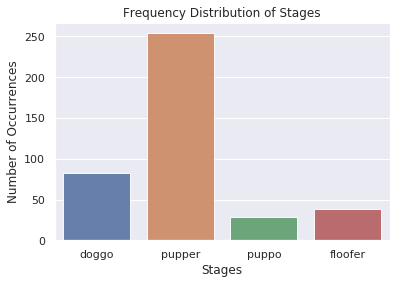

In [278]:
print(wrd_clean.stage.value_counts())

stage_count = wrd_clean['stage'].value_counts()
sns.set(style="darkgrid")
sns.barplot(stage_count.index, stage_count.values, alpha=0.9)
plt.title('Frequency Distribution of Stages')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Stages', fontsize=12)
plt.show()

#### `wrd_df` table - source column contains extraneous data 

#### Define

Determine the 4 source values as short words, and extract them out. Convert to category type with those 4 values.

##### Code

In [279]:
wrd_clean.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     1985
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                        91  
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                     30  
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>    11  
Name: source, dtype: int64

In [280]:
#  use the html label for source
source = wrd_clean.source.str.extract('.*\>(\w*[ -].*|\w*)<.*') 
source.columns= ['word']

In [281]:
# set to abbreviated name to use as category
for idx, row in source.iterrows():
    if "iPhone" in row.word:
        wrd_clean.at[idx, 'source'] = 'iPhone'
    elif "Vine - " in row.word:
        wrd_clean.at[idx, 'source'] = 'Vine'
    elif "Web Client" in row.word:
        wrd_clean.at[idx, 'source'] = 'WebClient'
    elif 'TweetDeck' in row.word:
        wrd_clean.at[idx, 'source'] = 'TweetDeck'
    else:
        wrd_clean.at[idx, 'source'] = 'None'

# convert to  category type
wrd_clean.source = wrd_clean.source.astype('category')

##### Test

In [282]:
wrd_clean.source.value_counts()

iPhone       1985
Vine         91  
WebClient    30  
TweetDeck    11  
Name: source, dtype: int64

In [283]:
wrd_clean.dtypes

tweet_id              int64   
source                category
expanded_urls         object  
timestamp             object  
rating_numerator      int64   
rating_denominator    int64   
name                  object  
stage                 category
dtype: object

iPhone       1985
Vine         91  
WebClient    30  
TweetDeck    11  
Name: source, dtype: int64


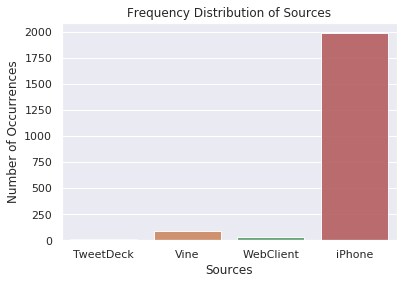

In [284]:
print(wrd_clean.source.value_counts())

source_count = wrd_clean['source'].value_counts()
sns.set(style="darkgrid")
sns.barplot(source_count.index, source_count.values, alpha=0.9)
plt.title('Frequency Distribution of Sources')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Sources', fontsize=12)
plt.show()

#### `img_pred_df` table many records are not dogs (p1_dog=False)

##### Define

Delete the rows where (p1,p2,p3)_dog=False.  In this case just keep  rows where Pn__dog is True

##### Code

In [285]:
sum(~img_pred_clean.p1_dog) + sum(~img_pred_clean.p2_dog) + sum(~img_pred_clean.p3_dog)


1641

In [286]:
img_pred_clean = img_pred_clean[img_pred_clean.p1_dog]
img_pred_clean = img_pred_clean[img_pred_clean.p2_dog]
img_pred_clean = img_pred_clean[img_pred_clean.p3_dog]


##### Test

In [287]:
sum(~img_pred_clean.p1_dog) + sum(~img_pred_clean.p2_dog) + sum(~img_pred_clean.p3_dog)

0

####  `twitter_df` table erroneous datatypes -     id, retweet_count and favorite_count should be int

##### Define
convert retweet_count and favorite_count to integer

##### Code

In [288]:
twitter_clean.retweet_count = twitter_clean.retweet_count.astype(int)
twitter_clean.favorite_count = twitter_clean.favorite_count.astype(int)

##### Test

In [289]:
twitter_clean.dtypes

id                int64 
retweet_count     int64 
favorite_count    int64 
lang              object
dtype: object

#### `wrd_df` table - timestamp should be converted to datetime type

##### Define

- convert wrd_df.timestamp to datetime

##### Code

In [290]:
wrd_clean['timestamp']= pd.to_datetime(wrd_clean['timestamp']) 

##### Test

In [291]:
wrd_clean.timestamp.head()

0   2017-08-01 16:23:56
1   2017-08-01 00:17:27
2   2017-07-31 00:18:03
3   2017-07-30 15:58:51
4   2017-07-29 16:00:24
Name: timestamp, dtype: datetime64[ns]

In [292]:
wrd_clean.dtypes

tweet_id              int64         
source                category      
expanded_urls         object        
timestamp             datetime64[ns]
rating_numerator      int64         
rating_denominator    int64         
name                  object        
stage                 category      
dtype: object

##### __combine tables__ into one master dataframe

##### Define
Now we need to combine the 3 dataframes into one.  We can do this by merging the tables on tweet_id. Since twitter_df uses id, it will need to be dropped manually.

##### Code

In [293]:
#  join tables on tweet_id and id.  Since names are different need to manually drop the id column when done.
twitter_archive_master = pd.merge(wrd_clean,
                 twitter_clean,
                 left_on='tweet_id',
                 right_on='id',
                 how='inner')

twitter_archive_master.drop('id',inplace=True, axis=1)


In [294]:
twitter_archive_master.dtypes

tweet_id              int64         
source                category      
expanded_urls         object        
timestamp             datetime64[ns]
rating_numerator      int64         
rating_denominator    int64         
name                  object        
stage                 category      
retweet_count         int64         
favorite_count        int64         
lang                  object        
dtype: object

In [295]:
twitter_archive_master = pd.merge(twitter_archive_master,
                 img_pred_clean,
                how='inner')

In [296]:
twitter_archive_master.shape

(1196, 22)

In [297]:
twitter_archive_master.dtypes

tweet_id              int64         
source                category      
expanded_urls         object        
timestamp             datetime64[ns]
rating_numerator      int64         
rating_denominator    int64         
name                  object        
stage                 category      
retweet_count         int64         
favorite_count        int64         
lang                  object        
jpg_url               object        
img_num               int64         
p1                    object        
p1_conf               float64       
p1_dog                bool          
p2                    object        
p2_conf               float64       
p2_dog                bool          
p3                    object        
p3_conf               float64       
p3_dog                bool          
dtype: object

In [298]:
twitter_archive_master.timestamp.min(),twitter_archive_master.timestamp.max()

(Timestamp('2015-11-15 22:32:08'), Timestamp('2017-08-01 00:17:27'))

####  Save cleaned file to text file

In [299]:
twitter_archive_master.to_csv('twitter_archive_master.csv', index=False)

### Data Analysis

> Read in the master file from twitter_archive_master.csv

In [301]:
twitter_archive_master = pd.read_csv('twitter_archive_master.csv')

#### First, I'll look at distribution of data.  I grouped some of the data if there was a big jump with little data in 75% and higher

>  It appears that most of the ratings are in the 10-13 range

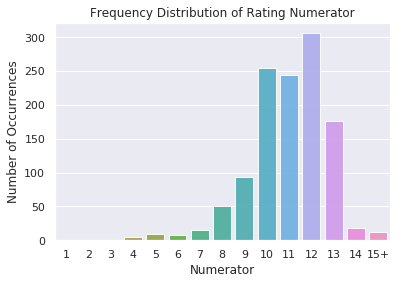

In [117]:
rating_numerator_count = twitter_archive_master[twitter_archive_master.rating_numerator<=14].rating_numerator.value_counts()
rating_numerator_count[15]  = (twitter_archive_master[twitter_archive_master.rating_numerator>15].rating_numerator.value_counts()).sum()
ind = (rating_numerator_count.sort_index().index)
lbl = np.char.mod('%d', ind)
lbl = np.where(lbl=='15', '15+', lbl) 

sns.set(style="darkgrid")
sns.barplot(rating_numerator_count.index, rating_numerator_count.values, alpha=0.9)
plt.title('Frequency Distribution of Rating Numerator')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Numerator', fontsize=12)
loc, labels = plt.xticks()
plt.xticks(loc,lbl)  # Set text labels and properties.
plt.show()

In [193]:
twitter_archive_master.retweet_count.describe()

count    1196.000000 
mean     2383.940635 
std      4155.913892 
min      11.000000   
25%      556.000000  
50%      1216.500000 
75%      2753.000000 
max      56793.000000
Name: retweet_count, dtype: float64

>  Similarly, the majority of retweets are< 3000

Text(0.5, 0, 'Retweet Count')

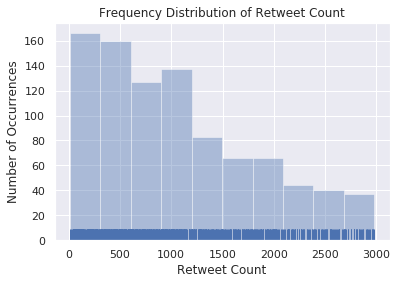

In [209]:
sns.set(style="darkgrid")
retweet_cts = twitter_archive_master[twitter_archive_master.retweet_count<=3000].retweet_count
dist = sns.distplot(retweet_cts, bins=10, kde=False, rug=True);
plt.title('Frequency Distribution of Retweet Count')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Retweet Count', fontsize=12)


In [292]:
twitter_archive_master.favorite_count.describe()

count    1196.000000  
mean     8461.070234  
std      12194.279777 
min      70.000000    
25%      1996.000000  
50%      4047.000000  
75%      10499.750000 
max      131376.000000
Name: favorite_count, dtype: float64

In [154]:
twitter_archive_master.retweet_count.describe(),twitter_archive_master.favorite_count.describe(),twitter_archive_master.rating_numerator.describe()

(count    1196.000000 
 mean     2383.940635 
 std      4155.913892 
 min      11.000000   
 25%      556.000000  
 50%      1216.500000 
 75%      2753.000000 
 max      56793.000000
 Name: retweet_count, dtype: float64, count    1196.000000  
 mean     8461.070234  
 std      12194.279777 
 min      70.000000    
 25%      1996.000000  
 50%      4047.000000  
 75%      10499.750000 
 max      131376.000000
 Name: favorite_count, dtype: float64, count    1196.000000
 mean     11.583612  
 std      7.912843   
 min      1.000000   
 25%      10.000000  
 50%      11.000000  
 75%      12.000000  
 max      165.000000 
 Name: rating_numerator, dtype: float64)

In [215]:
twitter_archive_master.p1.value_counts().describe()

count    110.000000
mean     10.872727 
std      15.831747 
min      1.000000  
25%      3.000000  
50%      6.000000  
75%      12.000000 
max      119.000000
Name: p1, dtype: float64

> ####   Use subset with 75th percentile of values to do further analysis.  This should eliminate the greatest outliers.

In [241]:
sub_master = twitter_archive_master[ (twitter_archive_master.p1_conf>.5) & (twitter_archive_master.rating_numerator<=20) & (twitter_archive_master.favorite_count<10500) & (twitter_archive_master.retweet_count<3000)]

>  #### There appears to be a strong correlation between favorite_count and retweet_count

> ####  I will do further analysis with Tableau and put that into the ACT report

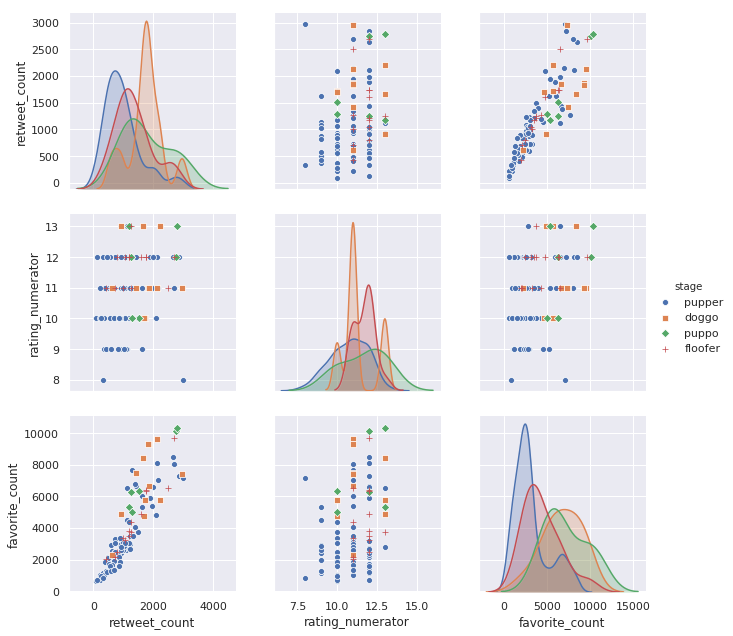

In [242]:
g = sns.pairplot(sub_master, height=3, hue="stage", markers=["o", "s", "D", "+"],
                 vars=["retweet_count", "rating_numerator", "favorite_count"])

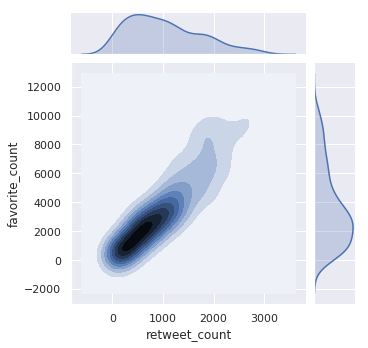

In [245]:
sns.jointplot(x="retweet_count", y="favorite_count", data=sub_master, kind="kde",height=5);